## Import packages


In [1]:
# system tools
import os
import sys
sys.path.append(os.path.join(".."))

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the data

In [2]:
filename = os.path.join("..", "data", "labelled_data", "fake_or_real_news.csv")

DATA = pd.read_csv(filename, index_col=0)

__Inspect data__

In [3]:
DATA.sample(10)

,title,text,label
9627,"American Tourist Can’t Get Over Dirty, Decayin...",0 Add Comment \r\nA VISITING American tourist ...,FAKE
7178,Load of manure dumped at Democratic headquarters,Print \r\nA load of manure was dumped outside ...,FAKE
5903,Quit Smoking! Smoking Cigarettes Causes 150 Ge...,You Are Here: Home » Health News » Quit Smokin...,FAKE
5199,The Daily 202: Many African Americans unenthus...,"RALEIGH, N.C.—Ayana McAllister went to Hillary...",REAL
813,How Ryan decided to ditch Trump,"""One should not insist on nailing [Trump] into...",REAL
4345,Is Hillary Running for Bill’s Third Term?,When Hillary Clinton announces her candidacy o...,REAL
2985,Court ruling on NSA spying splits 2016 field,Washington (CNN) A federal appeals court's rul...,REAL
868,Why Trump is still likely to fall 52 delegates...,There’s nothing quite like playing in front of...,REAL
7720,Clinton Staff Readies EMP Launch To Disable Al...,Report: Saxophone Still An Okay Vehicle For Se...,FAKE
7068,"If You Live HERE, Forget Christmas Lights – Th...",0 comments \r\nPerhaps no country has been mor...,FAKE


In [4]:
DATA.shape

(6335, 3)

<br>
Q: How many examples of each label do we have?

In [5]:
DATA["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

## Create balanced data

We can use the function ```balance``` to create a more even dataset.

In [6]:
DATA_balanced = clf.balance(DATA, 1000)

In [7]:
DATA_balanced.shape

(2000, 3)

<br>

What do the label counts look like now?

In [8]:
DATA_balanced["label"].value_counts()

FAKE    1000
REAL    1000
Name: label, dtype: int64

<br>

Let's now create new variables called ```texts``` and ```lables```, taking the data out of the dataframe so that we can mess around with them.

In [9]:
texts = DATA_balanced["text"]
labels = DATA_balanced["label"]

# Train-test split

I've included most of the 'hard work' for you here already, because these are long cells which might be easy to mess up while live-coding.

Instead, we'll discuss what's happening. If you have questions, don't be shy!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(texts,           # texts for the model
                                                    labels,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

# Vectorizing and Feature Extraction

Vectorization. What is it and why are all the cool kids talking about it?

Essentially, vectorization is the process whereby textual or visual data is 'transformed' into some kind of numerical representation. One of the easiest ways to do this is to simple count how often individual features appear in a document.

Take the following text: 
<br><br>
<i>My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.</i>
<br>

We can convert this into the following vector

| and | be | being | both | called | came | christian | could | explicit | family | father | i | infant | longer | make | more | my | myself | name | names | nothing | of | or | philip | pip | pirrip | s | so | than | to | tongue|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 1 | 1 | 1 | 1 | 1 |

<br>
Our textual data is hence reduced to a jumbled-up 'vector' of numbers, known somewhat quaintly as a <i>bag-of-words</i>.
<br>
<br>
To do this in practice, we first need to create a vectorizer. 

Tfidf vectors tend to be better for training classifiers. Why might that be?

__Create vectorizer object__

In [11]:
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units)
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 100)      # keep only top 500 features

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [12]:
# First we do it for our training data...
X_train_feats = vectorizer.fit_transform(X_train)
#... then we do it for our test data
X_test_feats = vectorizer.transform(X_test)
# We can also create a list of the feature names. 
feature_names = vectorizer.get_feature_names()

<br>
Q: What are the first 20 features that are picked out by the CountVectorizer?

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

In [13]:
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

Q: How do we use the classifier to make predictions?

In [14]:
y_pred = classifier.predict(X_test_feats)

Q: What are the predictions for the first 20 examples of the test data?

In [15]:
print(y_pred[0:20])

['REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'REAL'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL']


We can also inspect the model, in order to see which features are most informative when trying to predict a label. 

To do this, we can use the ```show_features``` function that I defined earlier - how convenient!

Q: What are the most informative features? Use ```show_features```to find out!

In [16]:
clf.show_features(vectorizer, y_train, classifier, n=20)

FAKE				REAL

-3.4694	us             		3.7056	republican     
-2.4142	by             		3.1769	but            
-2.3906	you            		2.3014	he             
-2.0160	election       		2.2753	president      
-1.4820	this           		2.2636	state          
-1.3427	just           		2.1522	that           
-1.2695	with           		2.1163	obama          
-1.2395	to the         		2.0283	than           
-1.1830	is             		1.8960	campaign       
-1.1523	was            		1.7735	on the         
-1.1307	be             		1.7270	who            
-1.0623	up             		1.6274	in             
-0.8876	into           		1.5178	more           
-0.8722	of             		1.4878	party          
-0.8595	no             		1.3185	other          
-0.8121	which          		1.3097	states         
-0.7815	that the       		1.1683	do             
-0.7596	like           		1.0804	she            
-0.7310	can            		1.0651	have           


## Evaluate

The computer has now learned a model of how our data behaves. Well done, computer! But is it accurate?

Q: How do we measure accuracy?

<img src="../img/confusionMatrix.jpg">

Thankfully, libraries like ```sklearn``` come with a range of tools that are useful for evaluating models.

One way to do this, is to use a confusion matrix, similar to what you see above.

Q: What should go in the argument called ```labels```?

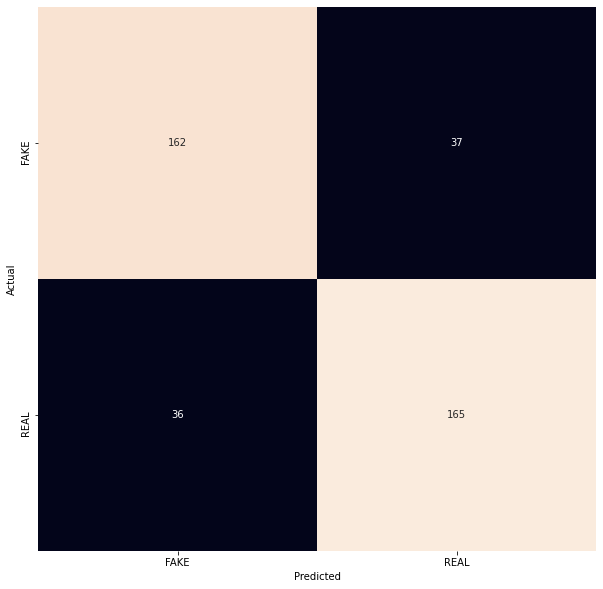

In [17]:
clf.plot_cm(y_test, y_pred, normalized=False)

We can also do some quick calculations, in order to assess just how well our model performs.

In [18]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.82      0.81      0.82       199
        REAL       0.82      0.82      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



## Cross validation and further evaluation

One thing we can't be sure of is that our model performance is simply related to how the train-test split is made.

To try to mitigate this, we can perform cross-validation, in order to test a number of different train-test splits and finding the average scores.

Let's do this on the full dataset

In [19]:
X_vect = vectorizer.fit_transform(texts)

The first plot is probably the most interesting. Some terminology:

- If two curves are "close to each other" and both of them but have a low score, the model suffers from an underfitting problem (High Bias)

- If there are large gaps between two curves, then the model suffer from an overfitting problem (High Variance)


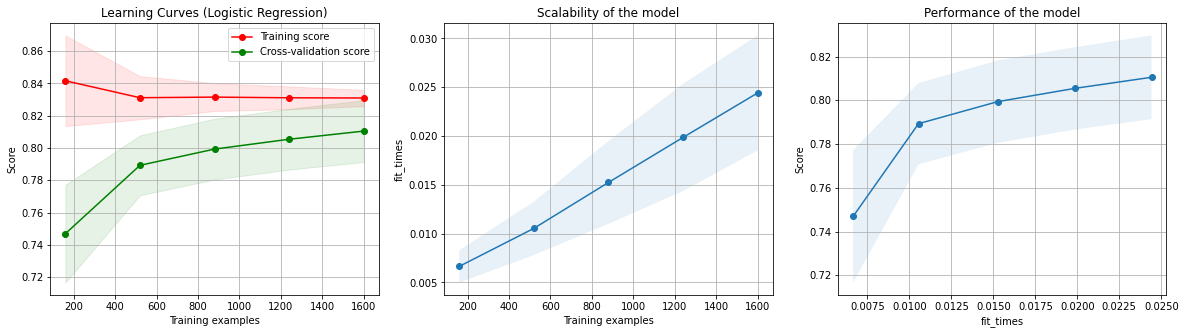

In [20]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, labels, cv=cv, n_jobs=4)

- The second plot shows the times required by the models to train with various sizes of training dataset. 
- The third plot show how much time was required to train the models for each training sizes.